In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from glob import glob

In [2]:
path = glob("../eolica-nas/2_simulaciones/CF_latam/cfs_sur_*.nc")

In [ ]:
%%time
todos_cf = []
for file in path:
    print(file)
    mex = xr.open_dataset(file)
    mex = mex.cf_wind.mean(dim="time")
    print("append")
    todos_cf.append(mex.values)
    del mex

../eolica-nas/2_simulaciones/CF_latam/cfs_sur_1980.nc


In [1]:
todos_cf = np.array(todos_cf)

NameError: name 'np' is not defined

In [5]:
mex_cf_wind = todos_cf.mean(axis=0)

In [6]:
np.savetxt("sur_cf_wind.csv", mex_cf_wind)

### Data

In [7]:
mex_lons = np.loadtxt("mex_longitude.csv")
mex_lats = np.loadtxt("mex_latitude.csv")
mex_cf_wind = np.loadtxt("mex_cf_sol.csv")

In [13]:
mex_cf_wind.max()

0.2494307710073186

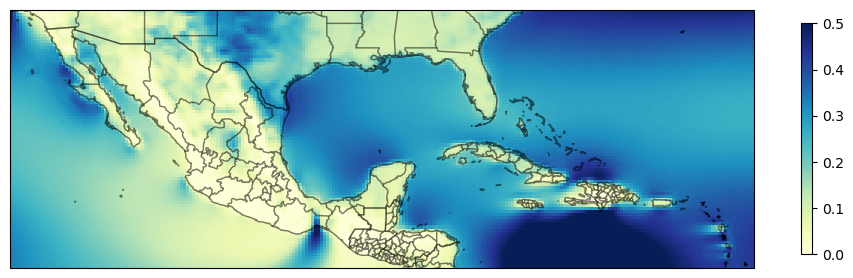

In [30]:
plt.figure(figsize=(12,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution="10m", alpha=0.3)
ax.add_feature(cfeature.BORDERS, alpha=0.3)
ax.add_feature(cfeature.STATES.with_scale("10m"), alpha=0.3)


p = ax.pcolormesh(mex_lons, mex_lats, mex_cf_wind, vmin=0, vmax=0.5, transform=ccrs.PlateCarree(), cmap="YlGnBu")
# p = ax.pcolormesh(latam.longitude, latam.latitude, latam.ws100[190], cmap='jet', vmin=0, vmax=14, transform=ccrs.PlateCarree())
# ax.add_feature(cfeature.OCEAN)
plt.colorbar(p, shrink=0.3)

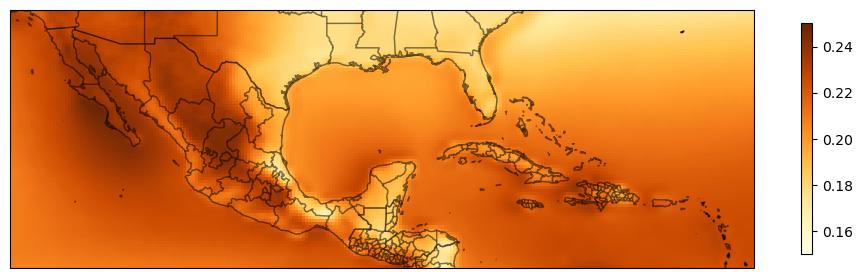

In [19]:
plt.figure(figsize=(12,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution="10m", alpha=0.3)
ax.add_feature(cfeature.BORDERS, alpha=0.3)
ax.add_feature(cfeature.STATES.with_scale("10m"), alpha=0.3)


p = ax.pcolormesh(mex_lons, mex_lats, mex_cf_wind, vmin=0.15, vmax=0.25, transform=ccrs.PlateCarree(), cmap="YlOrBr")
# p = ax.pcolormesh(latam.longitude, latam.latitude, latam.ws100[190], cmap='jet', vmin=0, vmax=14, transform=ccrs.PlateCarree())
# ax.add_feature(cfeature.OCEAN)
plt.colorbar(p, shrink=0.3)

In [17]:
mex_cf_wind.min()

0.16572167120390768